In [124]:
import math
import csv
from scipy.spatial.transform import Rotation as R
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import rosbag
from sensor_msgs.msg import Imu, NavSatFix
import scipy.io as sio
import numpy as np
from collections import OrderedDict

In [125]:
data_path = '/home/crange/dev/calib_ws/datas/calib_data_52/degree2radian/XYZ'

f = open(data_path + '/odometry_ori.txt', encoding="utf-8")

data_line = f.readline()
datas1 = []
while data_line:
    d = data_line.replace('\n', '').split()
    datas1.append(d)
    data_line = f.readline()

In [126]:
x = []
y = []
for i in range(len(datas1)):
    x.append(float(datas1[i][1]))
    y.append(float(datas1[i][2]))

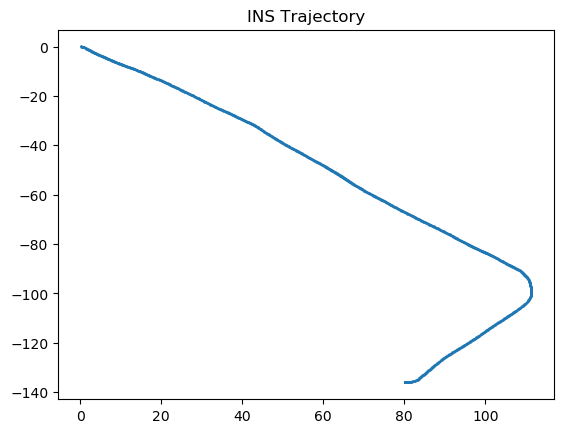

In [127]:
plt.title('INS Trajectory')
plt.scatter(x, y, 0.5)
plt.show()

In [128]:
# save_file = data_path + '/odom.txt'
# fout = open(save_file, 'w', encoding='utf-8')

# for i in range(len(datas1)):
#     print('{:.{}f}\t{:.{}f}\t{:.{}f}\t{:.{}f}\t{:.{}f}\t{:.{}f}\t{:.{}f}\t{:.{}f}'.format(float(datas1[i][0]), 9,
#                                                                                             float(datas1[i][2]), 9,
#                                                                                             float(datas1[i][1]), 9,
#                                                                                             float(datas1[i][3]), 9,
#                                                                                             float(datas1[i][4]), 9,
#                                                                                             float(datas1[i][5]), 9,
#                                                                                             float(datas1[i][6]), 9,
#                                                                                             float(datas1[i][7]), 9), file=fout)

In [136]:
file1 = data_path + '/odometry_loc.txt'
file2 = data_path + '/lidar_slam_pose.txt'

f = open(file1, encoding="utf-8")

data_line = f.readline()
odom = []
while data_line:
    d = data_line.replace('\n', '').split()
    odom.append(d)
    data_line = f.readline()

f.close()

f = open(file2, encoding="utf-8")

data_line = f.readline()
slam = []
while data_line:
    d = data_line.replace('\n', '').split()
    slam.append(d)
    data_line = f.readline()

f.close()

In [137]:
euler1 = []
for i in range(len(odom)):
    r = R.from_quat([float(odom[i][4]), float(odom[i][5]), float(odom[i][6]), float(odom[i][7])])
    euler = r.as_euler('xyz', degrees=True)
    euler1.append(euler)

euler2 = []
for i in range(len(slam)):
    r = R.from_quat([float(slam[i][4]), float(slam[i][5]), float(slam[i][6]), float(slam[i][7])])
    euler = r.as_euler('xyz', degrees=True)
    euler2.append(euler)

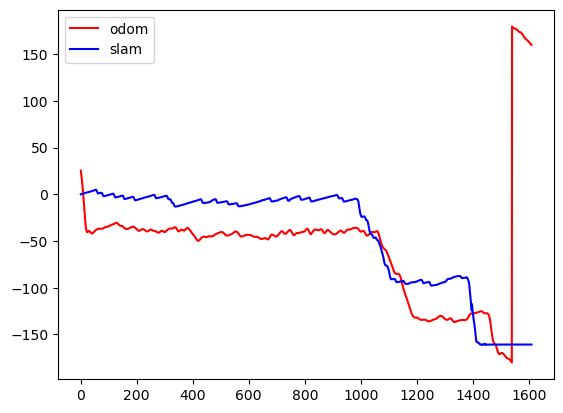

In [138]:
x = []
y1 = []
y2 = []
for i in range(len(euler2)):
    x.append(i + 1)
    y1.append(euler1[i][2])
    y2.append(euler2[i][2])


plt.plot(x, y1, 1, color='red', label='odom')
plt.plot(x, y2, 1, color='blue', label='slam')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

In [132]:
# s1 = 0
# for i in range(len(odom)):
#     if i > 1 and (euler1[i][2] % 360) - (euler1[i-1][2] % 360) > 350:
#         s1 = i

# s2 = 0
# for i in range(len(slam)):
#     if i > 1 and (euler2[i][2] % 360) - (euler2[i-1][2] % 360) > 350:
#         s2 = i

# # 144  odom
# x1 = []
# y1_ = []
# for i in range(len(odom)):
#     x1.append(i + 1)
#     if i > s1 - 1:
#         y1_.append(euler1[i][2] % 360 - 360)
#     else:
#         y1_.append(euler1[i][2] % 360)

# # 192  slam
# x2 = []
# y2_ = []
# for i in range(len(slam)):
#     if i > 60:
#         x2.append(i - 60)
#         if i > s2 - 1:
#             y2_.append(euler2[i][2] % 360 - 360)
#         else:
#             y2_.append(euler2[i][2] % 360)

# plt.plot(x1, y1_, 1, color='red', label='odom')
# plt.plot(x2, y2_, 1, color='blue', label='slam')
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.show()